# Introduction

This is German credit risk data from the UCI Machine Learning repository with 1000 entries with 10 categorial/symbolic

In this dataset, Each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.

The selected attributes are: Age (numeric) Sex (text: male, female) Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled) Housing (text: own, rent, or free) Saving accounts (text - little, moderate, quite rich, rich) Checking account (numeric, in DM - Deutsch Mark) Credit amount (numeric, in DM) Duration (numeric, in month) Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others Risk (Value target - Good or Bad Risk)

# Importing Packages
* pandas - to manipulate data frames
* numpy - providing linear algebra
* seaborn - to create nice visualizations
* matplotlib - basic tools for visualizations

In [103]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [104]:
!pip install plotly==4.14.3

In [105]:
import plotly.offline as py 
import plotly.graph_objs as go 

# Importing data
* Importing Datset


In [106]:
credit_data = pd.read_csv("C:/Users/Raj Mahajan/Credit-risk-modelling/german_credit_data.csv", index_col=0)
credit_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


# First Look at the data:
* Type of Data
* Null values
* Unique values
* The first rows of our dataset

In [107]:
#Searching for Missing values from the shape of data


credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [108]:
credit_data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [109]:
credit_data.shape

(1000, 10)

In [110]:
#let check the NaN values

credit_data.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [111]:
for col in ['Saving accounts', 'Checking account']:
    credit_data[col].fillna('none', inplace=True)

In [112]:
k = {0: 'unskilled and non-res', 1: 'unskilled and res', 2: 'skilled', 3: 'highly skilled'}
credit_data['Job'] = credit_data['Job'].map(k)

credit_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,skilled,own,none,little,1169,6,radio/TV,good
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,bad
2,49,male,unskilled and res,own,little,none,2096,12,education,good
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,good
4,53,male,skilled,free,little,little,4870,24,car,bad


# Data Exploration & Data Visualization

* Skilled workers are more likely to get 'good' risk rating
* Men in all the job category have a higher 'good' than women.

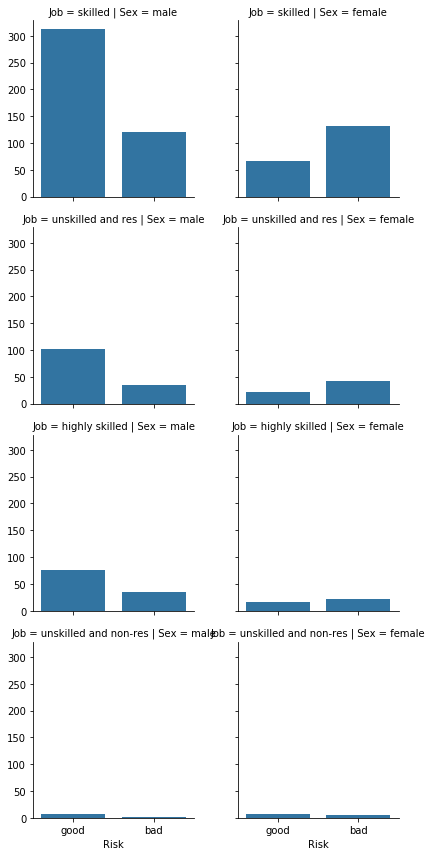

In [113]:

g = sns.FacetGrid(credit_data, col="Sex",  row="Job")

g = g.map(sns.countplot, "Risk")


# Risk Distribution based on Housing Status
 * Home owners are more likely to get a 'good' risk rating on their credit compared to rented individuals

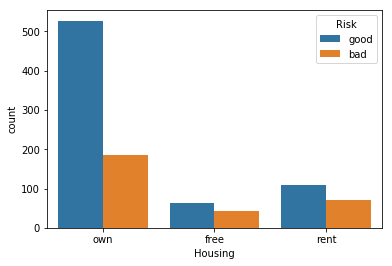

In [114]:
sns.countplot(x="Housing", hue="Risk", data=credit_data)
plt.show()

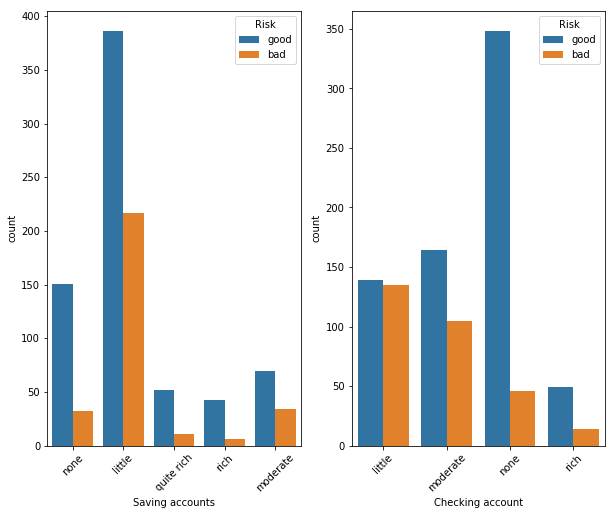

In [115]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))
sns.countplot(x="Saving accounts", hue="Risk", data=credit_data, ax=ax1)
sns.countplot(x="Checking account", hue="Risk", data=credit_data, ax=ax2)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


fig.show()

# Distribution of Credit Amount using Boxplot
* BY PURPOSE - Excluding furniture/equipment and repairs categories, almost all other categories have a larger IQR when it   comes to the   credit amounts of 'bad' loans.
* BY SAVINGS ACCOUNT - rich people tend to borrow less compared to poorer people
* BY JOB TYPE - skilled workers tend to have a bigger and higher IQR for bad loans than for good loans

 

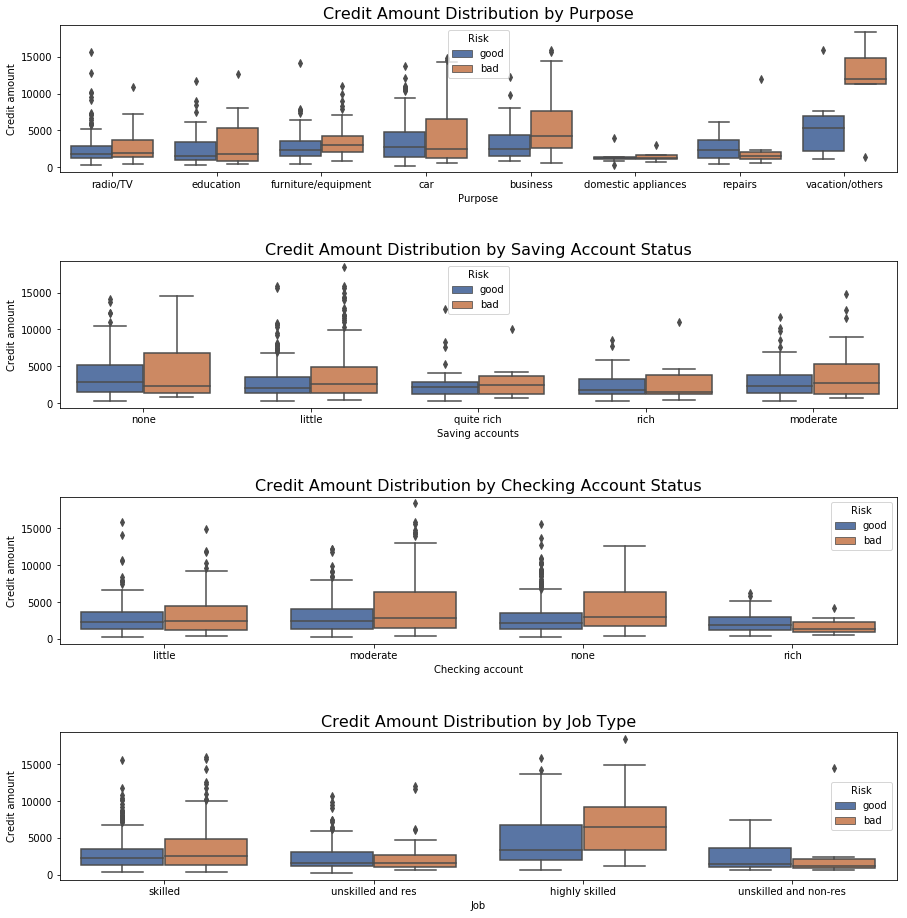

In [116]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,25))

sns.boxplot(x="Purpose", y="Credit amount", data=credit_data, hue="Risk", palette="deep", ax=ax1)
sns.boxplot(x="Saving accounts", y="Credit amount", data=credit_data, hue="Risk", palette="deep", ax=ax2)
sns.boxplot(x="Checking account", y="Credit amount", data=credit_data, hue="Risk", palette="deep", ax=ax3)
sns.boxplot(x="Job", y="Credit amount", data=credit_data, hue="Risk", palette="deep", ax=ax4)

ax1.set_title("Credit Amount Distribution by Purpose", fontsize=16)
ax2.set_title("Credit Amount Distribution by Saving Account Status", fontsize=16)
ax3.set_title("Credit Amount Distribution by Checking Account Status", fontsize=16)
ax4.set_title("Credit Amount Distribution by Job Type", fontsize=16)

plt.subplots_adjust(hspace = 0.6, top = 0.6)
plt.show()

# Credit Amount Distribution by Age 

 * Throughout all age gaps, bad loans tend to be of a higher amount but when it comes to people over 55, this gap widens
 

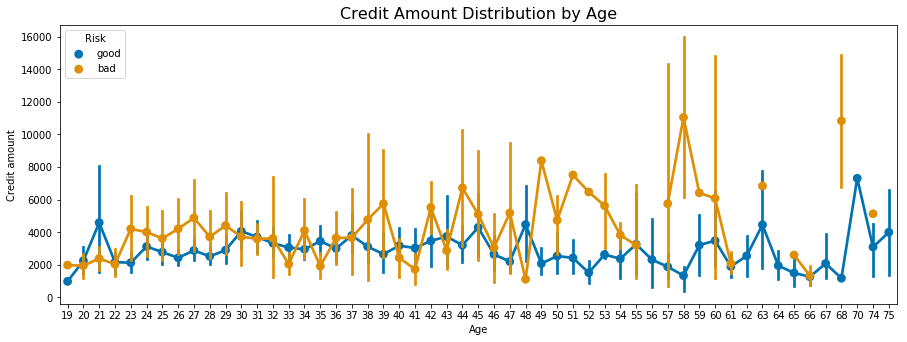

In [117]:
fig, (ax1) = plt.subplots(1,1, figsize=(15,5))

sns.pointplot(x="Age", y="Credit amount", data=credit_data, hue="Risk", palette="colorblind", ax=ax1)


ax1.set_title("Credit Amount Distribution by Age", fontsize=16)


plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)
plt.show()

#  Credit Amount Distribution by Loan Duration

 * larger loans over a longer duration are more likely to be classified as 'good'.

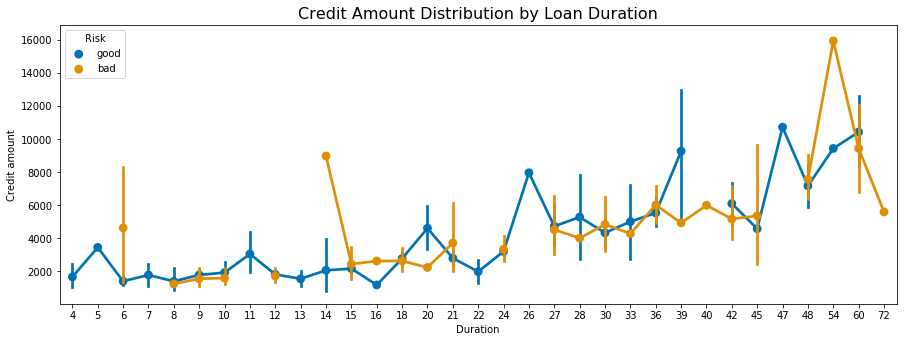

In [119]:
fig, (ax2) = plt.subplots(1,1, figsize=(15,5))
sns.pointplot(x="Duration",y="Credit amount" ,data=credit_data, hue="Risk", palette="colorblind", ax=ax2)

ax2.set_title("Credit Amount Distribution by Loan Duration", fontsize=16)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)
plt.show()